In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## import raw data

In [47]:
df = pd.read_excel('../database/export_binance/df_new.xlsx')
df

/var/folders/yl/s1pq6fh930j3frb4n30yfhv00000gn/T/ipykernel_6514/2301737341.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('../database/export_binance/df_new.xlsx')


,Unnamed: 0,User_ID,UTC_Time,Account,Operation,Coin,Change,Remark
0,1,1,2021-05-31 09:00:00,Spot,Deposit,SOL,25.000000,NaN
1,1,1,2021-05-31 09:00:00,Spot,Deposit,BTC,1.000000,NaN
2,1,1,2021-05-31 09:00:00,Spot,Deposit,BNB,35.000000,NaN
3,1,1,2021-05-31 09:00:00,Spot,Deposit,BUSD,50000.000000,NaN
4,1,1,2021-05-31 09:00:00,Spot,Deposit,USDT,50000.000000,NaN
...,...,...,...,...,...,...,...,...
9701,3070,15578312,2022-04-04 12:07:32,USDT-Futures,transfer_in,USDT,113.235373,NaN
9702,3110,15578312,2022-05-01 12:44:01,USDT-Futures,transfer_in,BUSD,221.751928,NaN
9703,3111,15578312,2022-05-01 12:44:01,Spot,transfer_out,BUSD,-221.751928,NaN
9704,3185,15578312,2022-05-11 22:11:08,Spot,transfer_out,USDT,-148.830000,NaN


## spot wallet

### wallet balance overview

In [49]:
#spot balance per coin, enhanced with a current price in USDT
df_spot = df.loc[df['Account'] == 'Spot']
balance_spot = df_spot.groupby('Coin').sum()['Change']
balance_spot

Coin
AAVE     1.100000e+00
ADA      1.306000e+02
ATOM     3.533031e+01
AUDIO    2.000000e+02
AVAX     5.972000e+01
BETA     0.000000e+00
BNB      9.426420e+00
BTC      1.372650e+00
BUSD     2.140355e+04
CAKE     4.546600e+02
CELR     0.000000e+00
DOT      0.000000e+00
EDG      1.136780e+02
EOS      1.421085e-14
ETH      2.299233e+00
EUR      6.820933e-14
FTM      1.110000e+03
FTT      1.541519e-15
LINK     8.633900e+01
LTC      0.000000e+00
LUNA     3.351500e+02
MANA     1.100000e+03
MATIC    2.713000e+02
NEAR     0.000000e+00
QUICK    3.000000e+00
RUNE     0.000000e+00
SAND     1.136868e-13
SOL      2.481000e+01
SUSHI   -2.842171e-14
UNI      3.552714e-15
USDC     4.947000e-03
USDT     4.416449e+03
WETH     0.000000e+00
XTZ      0.000000e+00
Name: Change, dtype: float64

In [50]:
df_prices = pd.read_excel('../database/prices/current_prices.xlsx', index_col=0)
df_prices

,symbol,price
0,ETHBTC,0.059244
1,LTCBTC,0.002042
2,BNBBTC,0.009548
3,NEOBTC,0.000398
4,QTUMETH,0.002192
...,...,...
2061,OPBUSD,0.913000
2062,OPUSDT,0.914000
2063,OGBUSD,3.193000
2064,KEYBUSD,0.004312


In [51]:
holding_prices = []
for i in balance_spot.index:
    if i == 'USDT':
        holding_prices.append(1)
    else:
        try:
            price = df_prices.loc[df_prices['symbol'] == (i + 'USDT')]['price'].values[0]
            holding_prices.append(price)
        except:
            holding_prices.append(np.nan)
balance_spot = pd.DataFrame(balance_spot)
balance_spot['USDT_price'] = holding_prices
balance_spot['USDT_value'] = holding_prices * balance_spot['Change']
print(f'current total value: {round(balance_spot["USDT_value"].sum(), 2)} USDT')
balance_spot.sort_values(by='USDT_value', ascending=False, inplace=True)
balance_spot


current total value: 82620.71 USDT


,Change,USDT_price,USDT_value
Coin,,,
BTC,1.372650e+00,30153.47000,4.139016e+04
BUSD,2.140355e+04,1.00070,2.141853e+04
USDT,4.416449e+03,1.00000,4.416449e+03
ETH,2.299233e+00,1786.25000,4.107006e+03
BNB,9.426420e+00,287.90000,2.713866e+03
CAKE,4.546600e+02,4.43800,2.017781e+03
AVAX,5.972000e+01,24.08000,1.438058e+03
MANA,1.100000e+03,0.98110,1.079210e+03
LUNA,3.351500e+02,2.99180,1.002702e+03


### funding history

In [52]:
df_spot.loc[df_spot['Operation'] == 'Deposit'].groupby('Coin').sum()['Change']

Coin
BNB        35.000000
BTC         1.000000
BUSD    50000.000000
CAKE      454.661150
SOL        25.000000
USDC      477.904947
USDT    50000.000000
WETH        1.164775
Name: Change, dtype: float64

In [53]:
df_spot.loc[df_spot['Operation'] == 'Withdraw'].groupby('Coin').sum()['Change']

Coin
AVAX    -200.000000
CAKE    -422.284560
ETH       -2.710175
FTM    -3225.000000
Name: Change, dtype: float64

### trades per coin plot

In [54]:
prices = pd.read_excel('../ETHUSDT_1d_30jun2021_7jun2022.xlsx')
prices['open_time'] = pd.to_datetime(prices.open_time, unit='ms')
prices = prices.drop(['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'close_time'], axis=1)
prices

FileNotFoundError: [Errno 2] No such file or directory: '../ETHUSDT_1d_30jun2021_7jun2022.xlsx'

In [32]:
buy = df_spot.loc[df_spot['Operation'] == 'Buy'].loc[df_spot['Coin'] == 'FTM'].groupby('UTC_Time').sum()['Change'].reset_index()
buy['UTC_Time'] = pd.to_datetime(buy['UTC_Time'], unit='ms')
buy

,UTC_Time,Change
0,2021-10-11 09:36:23,600.0
1,2021-10-11 12:17:44,1740.0


In [33]:
sell = df_spot.loc[df_spot['Operation'] == 'Sell'].loc[df_spot['Coin'] == 'FTM'].groupby('UTC_Time').sum()['Change'].reset_index()
sell['UTC_Time'] = pd.to_datetime(sell['UTC_Time'], unit='ms')
sell

,UTC_Time,Change
0,2021-10-13 17:48:35,-2278.0


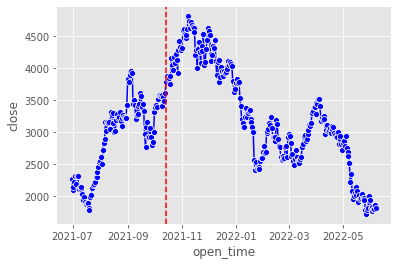

In [39]:
sns.lineplot(x='open_time', y='close', data=prices, color='blue', marker='o')
#plt.axvline(buy['UTC_Time'], color='g', linestyle='--')
plt.axvline(sell['UTC_Time'], color='r', linestyle='--');